<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/DT_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### Step 1:

* Read the test and train datasets
* Separate the SalePrice as target variable
* Create a train and validation dataset from the train dataset that you created in the first step
* Check if you have any categorical features
* Check if you have any numerical features






In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
173,174,20,RL,80.0,10197,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,COD,Normal,163000
995,996,50,RL,51.0,4712,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Abnorml,121600
710,711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
616,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200
724,725,20,RL,86.0,13286,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,320000
697,698,20,RL,57.0,6420,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,123500
1410,1411,60,RL,79.0,12420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,230000


In [ ]:
X = train_data.drop('SalePrice', axis = 1)
y = train_data['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
categorical_columns = [column_name for column_name in X.columns if X[column_name].dtype == 'object' and X[column_name].nunique() < 10]
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
numerical_columns = [column_name for column_name in X.columns if X[column_name].dtype == 'int64' or X[column_name].dtype == 'float64'  ]
numerical_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Step 2

* Create a pipeline of `SimpleImputer` and `StandardScaler` transformers for the numerical data
* Bundle the pre-processing steps into a column transformer
* Create a RandomForestRegressor




In [ ]:
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
                                        ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [ ]:
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numerical_columns),
                                                 ('cat', categorical_transformer, categorical_columns)])

In [ ]:
rfr_pipe = Pipeline(steps = [('prep', preprocessor),
                             ('regressor', RandomForestRegressor(n_estimators = 100, random_state = 0))])

In [ ]:
rfr_pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFin...
                                                   'LotConfig', 'LandSlope',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'FireplaceQu', ...])])),
                ('regressor', RandomForestRegressor(random_state=0))])

In [ ]:
rfr_pipe.score(X_train, y_train), rfr_pipe.score(X_test, y_test)

(0.976703554418495, 0.8404687499753263)

In [ ]:
y_pred = rfr_pipe.predict(X_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 17319.015780821916


In [ ]:
rfr_pipe.named_steps['regressor'].feature_importances_

array([4.22424720e-03, 1.63478301e-03, 6.82728574e-03, 1.37350958e-02,
       5.61516066e-01, 5.38423413e-03, 1.25993456e-02, 5.70534179e-03,
       1.25872727e-02, 2.94135780e-02, 4.79583251e-04, 6.13123078e-03,
       3.98233353e-02, 2.41636620e-02, 8.93556235e-03, 1.64602191e-04,
       1.21291745e-01, 1.11866722e-03, 1.26012015e-03, 1.55781569e-03,
       1.35495298e-03, 1.71928473e-03, 1.14109381e-03, 7.45218103e-03,
       2.85916791e-03, 4.27948533e-03, 2.88104177e-02, 1.84692026e-02,
       5.67387339e-03, 4.80634563e-03, 7.46123325e-04, 2.15996727e-04,
       4.58851150e-04, 2.59885235e-05, 6.60962975e-05, 6.01590569e-03,
       1.38788361e-03, 2.52686285e-04, 1.61860058e-04, 1.70216921e-05,
       6.68148137e-04, 1.60941441e-03, 2.13580843e-05, 9.52840637e-06,
       1.84495593e-04, 4.86889422e-05, 6.26183526e-04, 9.47469864e-05,
       2.29731084e-06, 2.50256910e-03, 6.56971321e-04, 7.67950554e-05,
       5.17182942e-05, 5.14919745e-04, 0.00000000e+00, 8.51574818e-08,
      

In [ ]:
X.shape, X_train.shape, X_test.shape

((1460, 80), (1095, 80), (365, 80))

In [ ]:
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed.shape

(1095, 226)

In [ ]:
feature_names = rfr_pipe.named_steps['prep'].get_feature_names_out()

In [ ]:
feature_names.shape

(226,)

In [ ]:
feature_importances_df = pd.DataFrame({'Feature': feature_names,
                                       'Importance' : rfr_pipe.named_steps['regressor'].feature_importances_})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending = False)
feature_importances_df

,Feature,Importance
4,num__OverallQual,5.615161e-01
16,num__GrLivArea,1.212917e-01
12,num__TotalBsmtSF,3.982334e-02
9,num__BsmtFinSF1,2.941358e-02
26,num__GarageCars,2.881042e-02
...,...,...
98,cat__RoofMatl_Membran,2.215862e-09
96,cat__RoofStyle_Shed,0.000000e+00
76,cat__Condition2_PosN,0.000000e+00
54,cat__Utilities_AllPub,0.000000e+00


/tmp/ipython-input-1380808619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Feature', y = 'Importance', data = feature_importances_df.head(20), palette = 'RdYlBu')


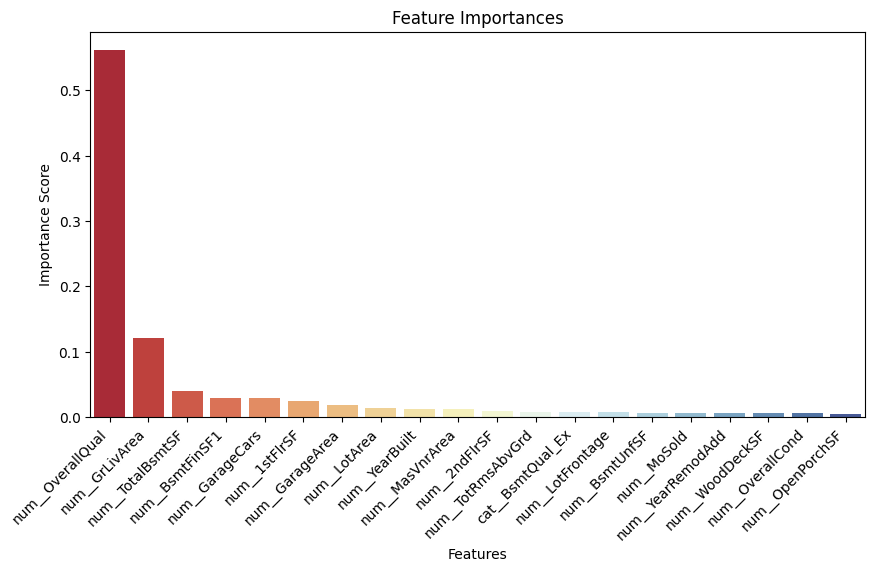

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Feature', y = 'Importance', data = feature_importances_df.head(20), palette = 'RdYlBu')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()